In [24]:
# Importando as bibliotecas
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import os

In [25]:
# Carregando a base de dados
df = pd.read_csv('OD_2017_LIMPA2.csv', sep=';')

In [26]:
df

,Nome,Domicilios,Populacao,RendaTotal,RendaMediaFamiliar,RendaPerCapita,MatriculasEscolares,Empregos,ViagensDeBicicleta
0,Praça João Mendes,7100,17130,27827235,3919,1624,2399,18547,331
1,Ladeira da Memória,12588,24089,65571511,5209,2722,1127,22554,1084
2,Santa Ifigênia,9411,21989,25210175,2679,1146,2039,38372,1565
3,Bom Retiro,3834,12252,13815270,3361,1128,3280,15080,566
4,Bresser,3148,8427,8881359,2735,1054,162,14171,253
...,...,...,...,...,...,...,...,...,...
155,Jardim João XXIII,13702,43732,44323733,3193,1014,13015,13304,617
156,Jardim Ester Yolanda,13398,40378,62682374,4678,1552,7018,10114,507
157,Jardim Adalgiza,14943,45585,53820888,3602,1181,4163,10317,191
158,Parque Continental,8657,22537,45592587,5267,2023,6371,15255,191


In [27]:
df.dtypes

Nome                   object
Domicilios              int64
Populacao               int64
RendaTotal              int64
RendaMediaFamiliar      int64
RendaPerCapita          int64
MatriculasEscolares     int64
Empregos                int64
ViagensDeBicicleta      int64
dtype: object

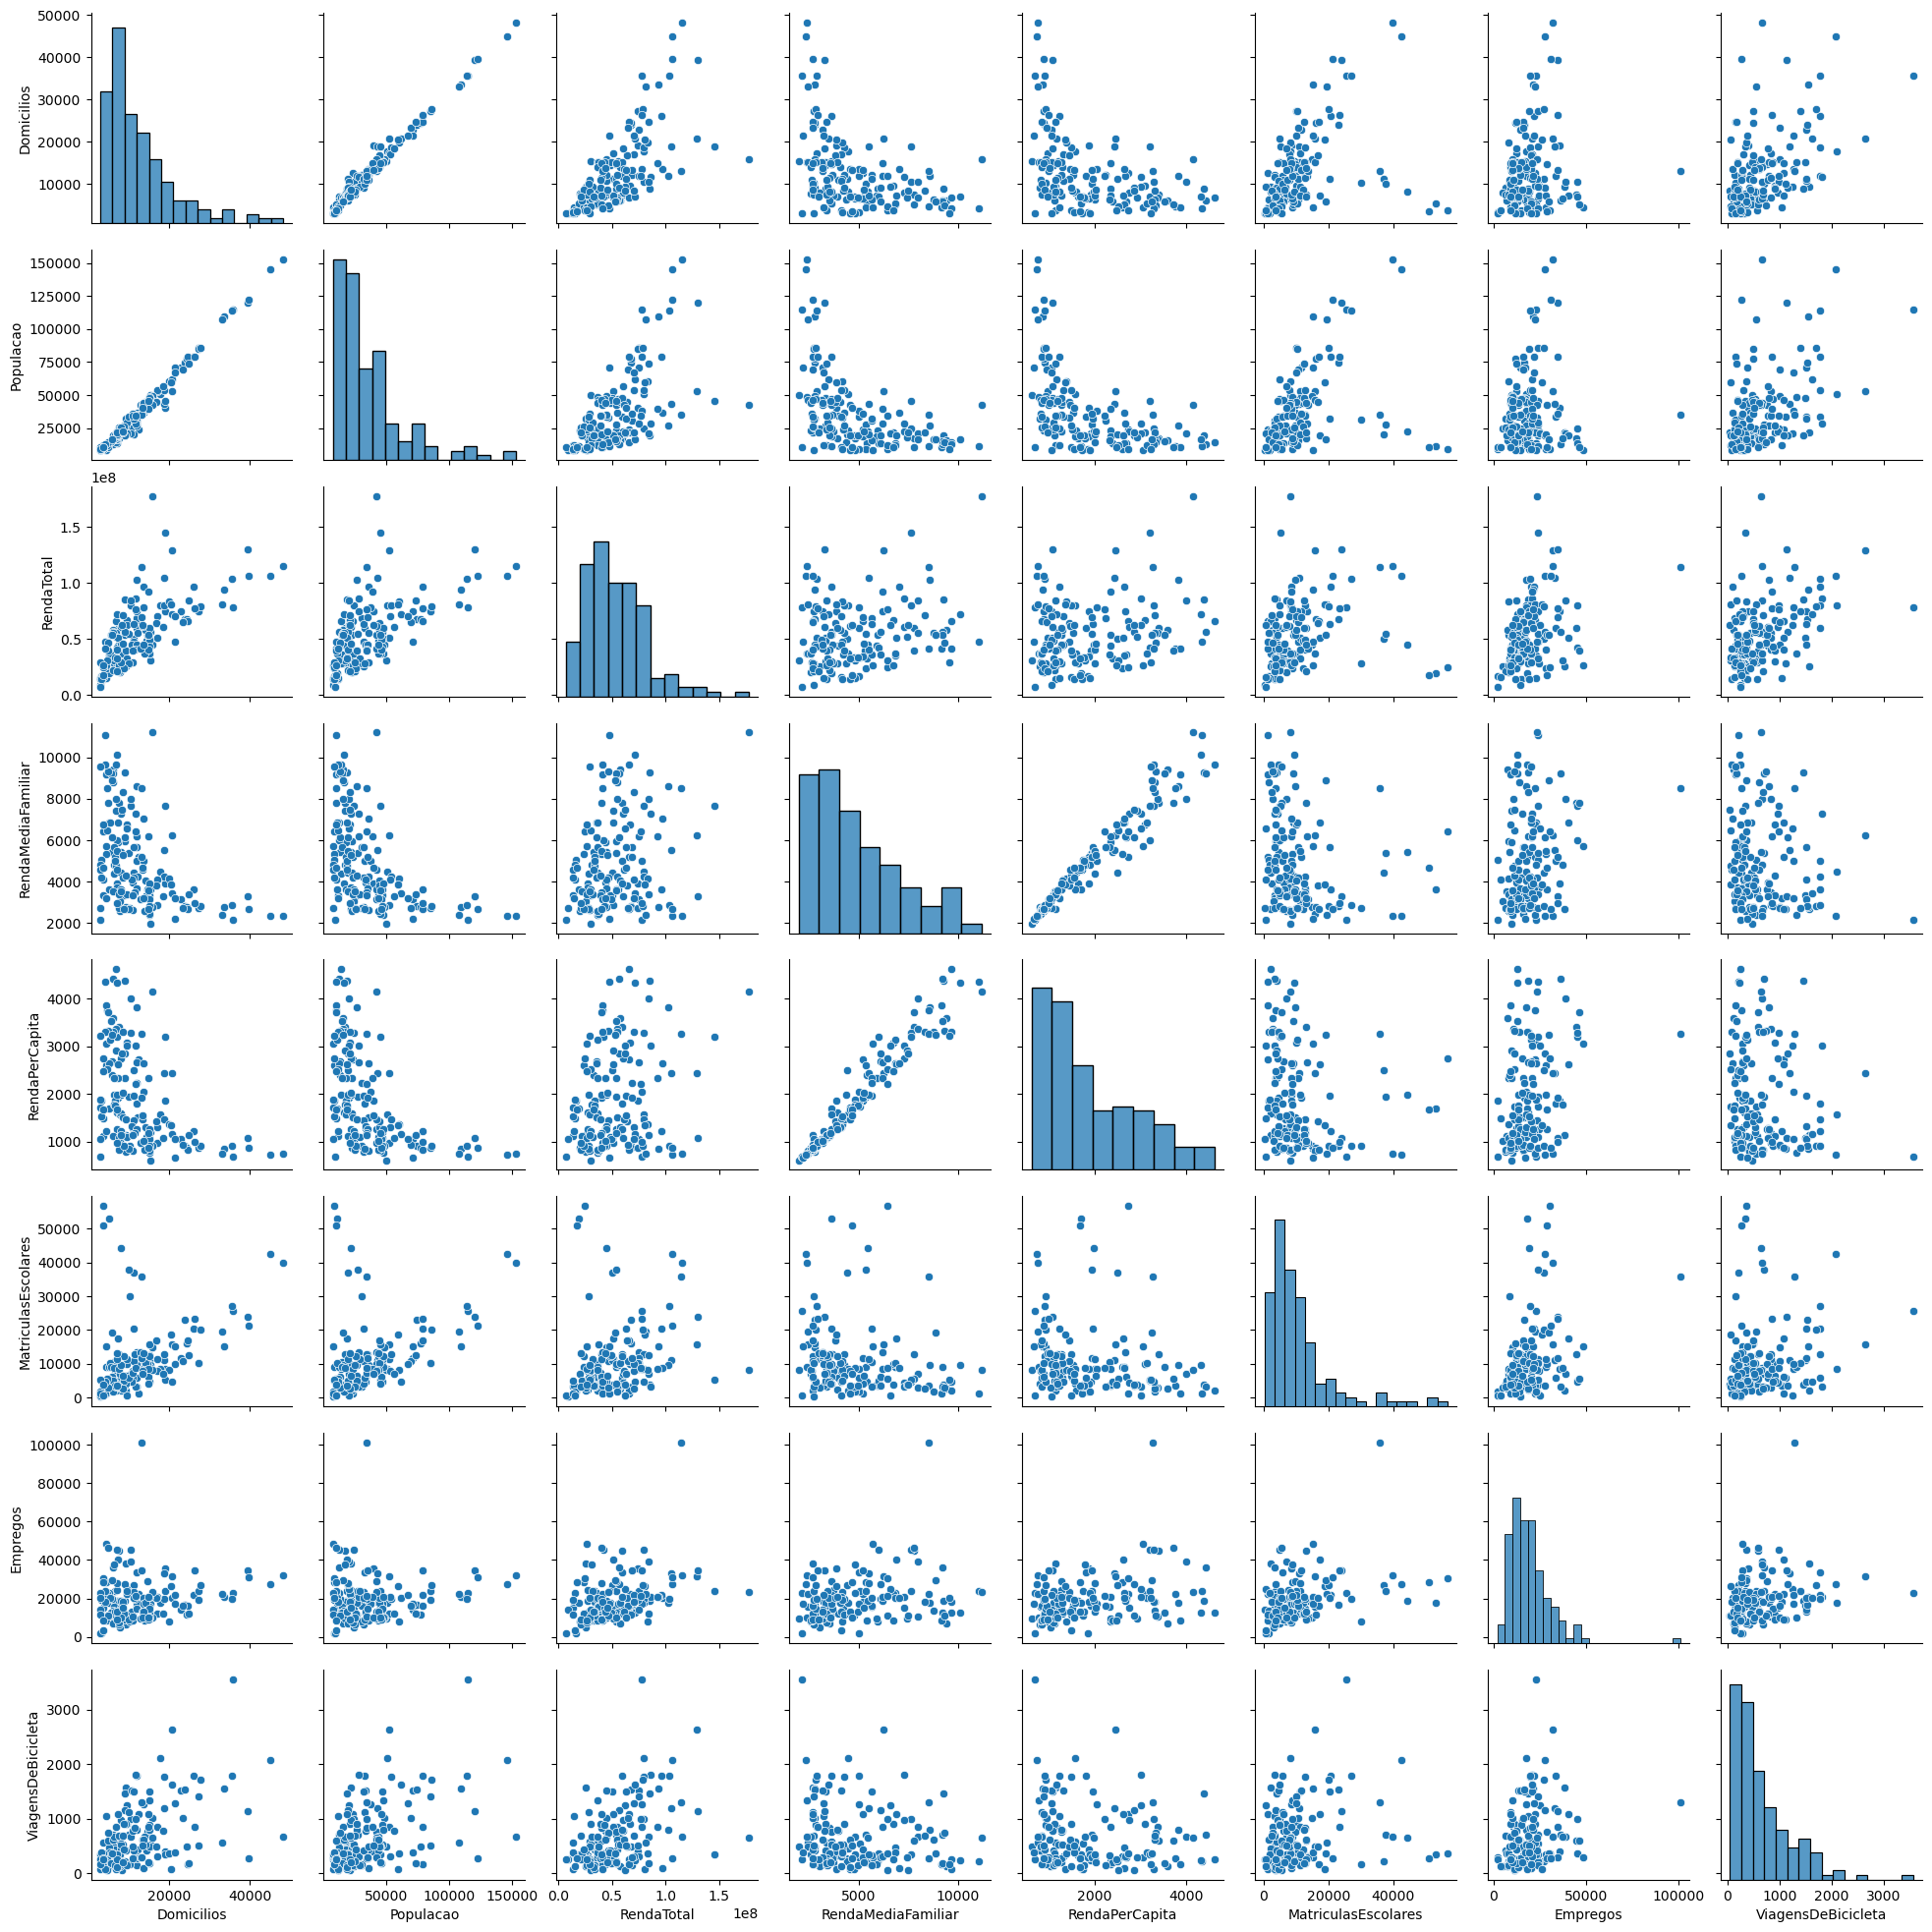

In [28]:
# GRÁFICO DE CORRELAÇÃO
sns.pairplot(df)

In [29]:
correlacoes = df.corr(method='pearson')
correlacoes

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7600\3000246978.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = df.corr(method='pearson')


,Domicilios,Populacao,RendaTotal,RendaMediaFamiliar,RendaPerCapita,MatriculasEscolares,Empregos,ViagensDeBicicleta
Domicilios,1.000000,0.990378,0.680464,-0.449197,-0.451900,0.402269,0.158080,0.487843
Populacao,0.990378,1.000000,0.608754,-0.500146,-0.519914,0.400113,0.097676,0.469276
RendaTotal,0.680464,0.608754,1.000000,0.222306,0.202479,0.218782,0.373102,0.432513
RendaMediaFamiliar,-0.449197,-0.500146,0.222306,1.000000,0.968148,-0.204758,0.247099,-0.162430
RendaPerCapita,-0.451900,-0.519914,0.202479,0.968148,1.000000,-0.190862,0.306022,-0.151802
MatriculasEscolares,0.402269,0.400113,0.218782,-0.204758,-0.190862,1.000000,0.339773,0.175216
Empregos,0.158080,0.097676,0.373102,0.247099,0.306022,0.339773,1.000000,0.250285
ViagensDeBicicleta,0.487843,0.469276,0.432513,-0.162430,-0.151802,0.175216,0.250285,1.000000


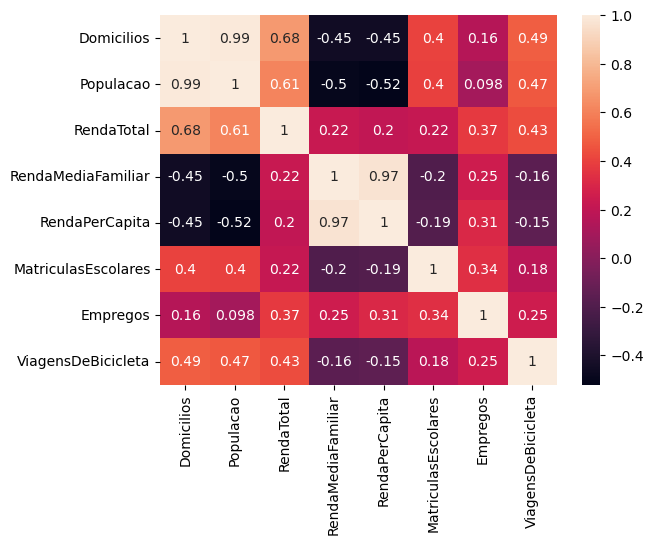

In [30]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

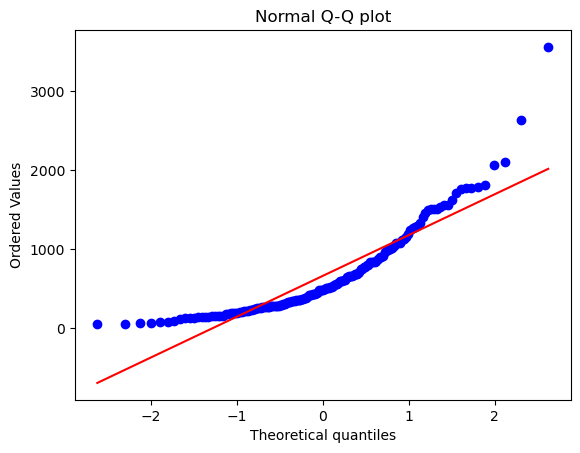

In [31]:
#ANÁLISE DA NORMALIDADE
stats.probplot(df['ViagensDeBicicleta'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

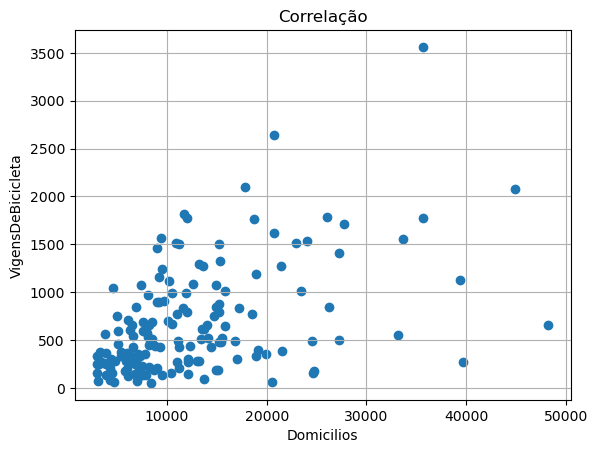

In [33]:
plt.scatter(df.Domicilios,df.ViagensDeBicicleta)
plt.title('Correlação')
plt.xlabel('Domicilios')
plt.ylabel('VigensDeBicicleta')
plt.grid(True)
plt.show()